In [ ]:
!unzip train

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D

In [2]:
(train_images,train_labels),(test_images,test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
print(list(range(9)))

[0, 1, 2, 3, 4, 5, 6, 7, 8]


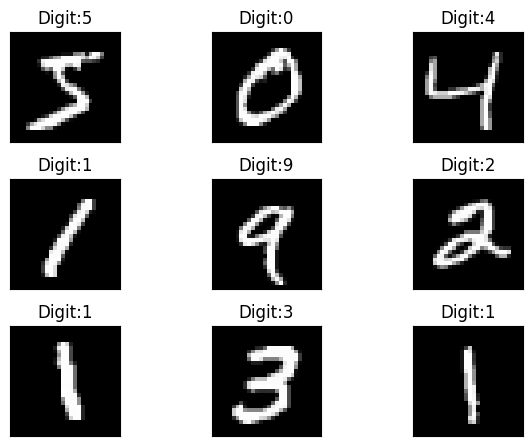

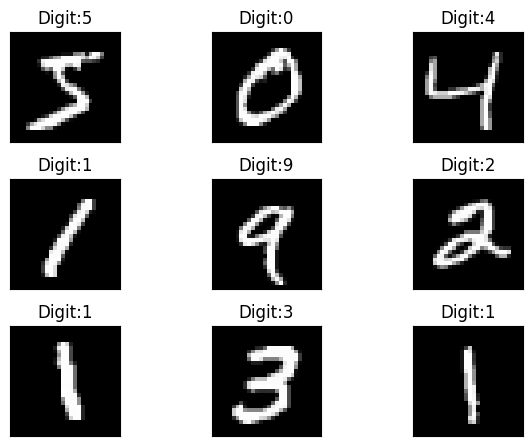

In [6]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title("Digit:{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [7]:
train_images.shape

(60000, 28, 28)

In [10]:
train_images.shape[0]

60000

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
train_images = train_images/255.0
test_images = test_images/255.0

In [11]:
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8821 - loss: 0.3652 - val_accuracy: 0.9850 - val_loss: 0.0500
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9845 - loss: 0.0495 - val_accuracy: 0.9870 - val_loss: 0.0398
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0335 - val_accuracy: 0.9909 - val_loss: 0.0298
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9920 - loss: 0.0248 - val_accuracy: 0.9901 - val_loss: 0.0324
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0205 - val_accuracy: 0.9884 - val_loss: 0.0472


In [15]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(f'test accuracy : {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9845 - loss: 0.0597
test accuracy : 0.9883999824523926


In [16]:
test_loss,test_acc = model.evaluate(train_images,train_labels)
print(f'train accuracy : {test_acc}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9933 - loss: 0.0220
test accuracy : 0.9932166934013367


In [17]:
import numpy as np

In [18]:
predictions = model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [25]:
len(predictions)

10000

In [26]:
predictions

array([[1.2789280e-09, 9.8562705e-09, 1.5535923e-07, ..., 9.9999976e-01,
        2.4575447e-10, 7.5981692e-09],
       [8.9664177e-08, 1.8870237e-07, 9.9999940e-01, ..., 1.0116724e-13,
        6.2989813e-09, 8.6434757e-18],
       [3.1274226e-11, 9.9999988e-01, 1.1553211e-08, ..., 1.1799428e-08,
        2.2966971e-08, 4.1234469e-10],
       ...,
       [4.6303780e-15, 7.7836575e-08, 7.7234963e-12, ..., 6.8569650e-10,
        4.5451647e-09, 4.4851141e-09],
       [6.2474701e-09, 5.8668977e-12, 1.4147269e-11, ..., 6.4900051e-11,
        6.4318933e-06, 1.3029353e-10],
       [1.0862869e-08, 8.7388131e-11, 1.3318593e-10, ..., 2.3932816e-15,
        5.5856760e-11, 1.0102427e-12]], dtype=float32)

In [27]:
np.argmax(predictions[0])

7

In [31]:
def predict_image(image_index):
  pred_label = np.argmax(predictions[image_index])
  true_label = test_labels[image_index]
  plt.figure()
  plt.imshow(test_images[image_index].reshape(28,28),cmap=plt.cm.binary)
  plt.title(f"Predicted: {pred_label} ,True Label: {true_label}")
  plt.axis("off")
  plt.show()

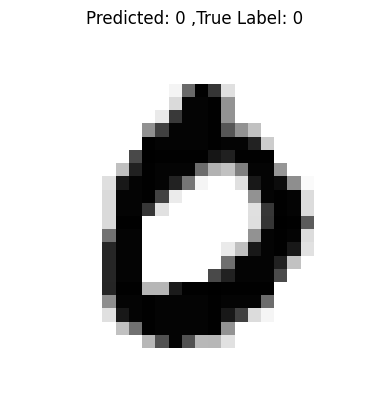

In [35]:
predict_image(3)